In [62]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Lecture/情報理工学実験1/2024/

/content/drive/MyDrive/Lecture/情報理工学実験1/2024


# 課題 7.6〜7.10

In [48]:
Xs = np.loadtxt('20.data', delimiter=' ', usecols=0)
Ys = np.loadtxt('20.data', delimiter=' ', usecols=1)

[ 5.22948201e+04 -2.78375197e+05  6.40998055e+05 -8.36023344e+05
  6.78850272e+05 -3.54842638e+05  1.19033260e+05 -2.46454863e+04
  2.84976308e+03 -1.38768341e+02]
[ 5.39809946e+04 -2.87128085e+05  6.60671343e+05 -8.61098045e+05
  6.98775316e+05 -3.65053187e+05  1.22398087e+05 -2.53309170e+04
  2.92780999e+03 -1.42541395e+02]


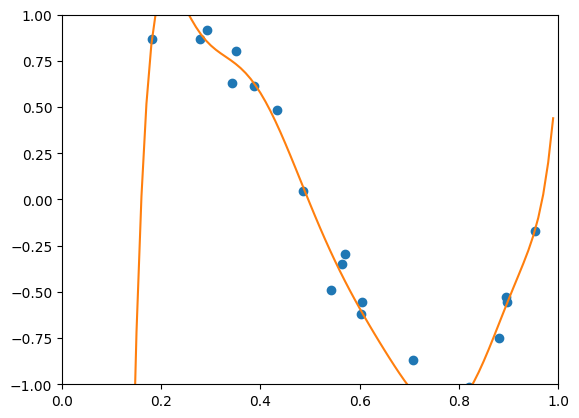

In [60]:
# 最小二乗法
def leastSquares(X, Y, degree):
  Xs = []
  for i in range(degree + 1):
    Xs.append(X ** i)
  Xs = np.array(Xs).T
  Y = Y.T
  XT = Xs.transpose()
  W = np.dot(np.dot(np.linalg.inv(np.dot(XT, Xs)), XT), Y)
  return W[::-1]

print(leastSquares(Xs, Ys, 9))

# use polyfit
f = np.polyfit(Xs, Ys, 9)
p = np.poly1d(f)
print(f)
x_pred = np.arange(0.0, 1.0, 0.01)
y_pred = p(x_pred)

plt.axis([0, 1, -1, 1])
plt.plot(Xs, Ys, 'o')
plt.plot(x_pred, y_pred)
plt.show()

Fitting Parameters: [-3.12629331e+03  1.05988663e+04 -1.16081419e+04 -8.32355766e+00
  1.09300703e+04 -1.06003015e+04  4.90006412e+03 -1.24575632e+03
  1.67588655e+02 -8.39305695e+00]


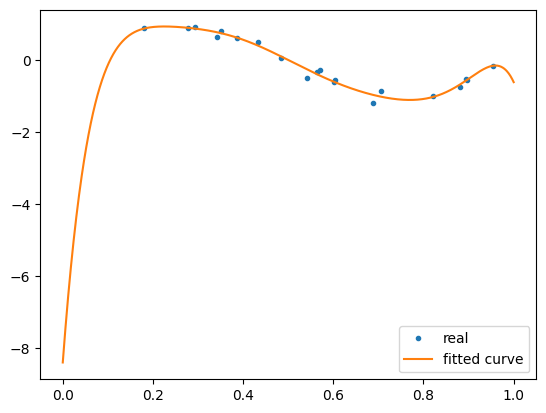

In [70]:
# use leastSq
def real_func(x):
  return np.sin(2 * np.pi * x)

def fit_func(p, x):
  f = np.poly1d(p)
  return f(x)

def residuals_func(p, x, y):
  ret = fit_func(p, x) - y
  return ret

def fitting(M=0):
  p_init = np.random.rand(M + 1)
  p_lsq = leastsq(residuals_func, p_init, args=(Xs, Ys))
  print(f"Fitting Parameters: {p_lsq[0]}")

  plt.plot(Xs, Ys, '.', label='real')
  plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
  plt.legend()
  return p_lsq

x_points = np.linspace(0, 1, 1000)
p_lsq_0 = fitting(M=9)

# 課題 7.11

In [72]:
def rmse(predictions, targets):
  return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = p(Xs)
rmse_pred = rmse(y_pred, Ys)
print(f"rms erros is: {rmse_pred}")

rms erros is: 0.09758041356107168


# 課題 7.12

In [76]:
x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.5)
f = np.polyfit(x_train, y_train, 3)
p = np.poly1d(f)

# 課題 7.13

In [77]:
y_train_pred = p(x_train)
rmse_train = rmse(y_train_pred, y_train)
print(f"rms erros is: {rmse_train}")

rms erros is: 0.06414421605228837


# 課題 7.14

In [78]:
y_test_pred = p(x_test)
rmse_test = rmse(y_train_pred, y_test)
print(f"rms erros is: {rmse_test}")

rms erros is: 1.188808619803185


# 課題 7.15

[0.3423797583577366, 0.2552825052907757, 0.06414421605228837, 0.056670884735815684, 0.03938437491022227, 0.026374276880200182, 0.013809731466502589, 0.013503862535160706, 4.547142389601337e-09] [0.5225264613079337, 0.3854009379330787, 0.14474067755207917, 0.15621222596685938, 0.14542741043081792, 0.23150544868508513, 0.8889370725706808, 1.0851581065702218, 3.119096043382599]
<class 'list'>


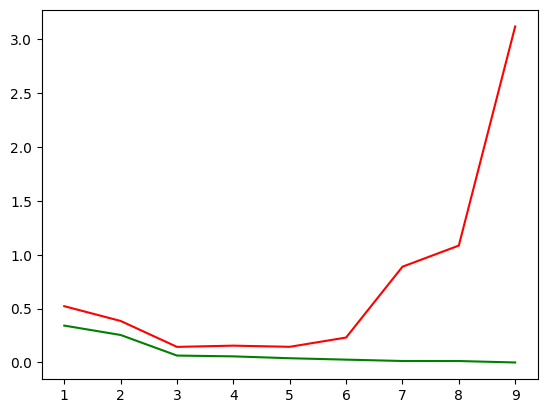

In [81]:
M = list(range(1,10))
RMSE_train = []
RMSE_test = []

for num in M:
  f = np.polyfit(x_train, y_train, num)
  p = np.poly1d(f)
  y_train_pred = p(x_train)
  rmse_train = rmse(y_train_pred, y_train)
  RMSE_train.append(rmse_train)
  y_test_pred = p(x_test)
  rmse_test = rmse(y_test_pred, y_test)
  RMSE_test.append(rmse_test)

print(RMSE_train, RMSE_test)
print(type(RMSE_train))
plt.plot(M, RMSE_train, color='green', label='training error')
plt.plot(M, RMSE_test, color='red', label='testing error')